# NONPARAMETRIC TESTS
BS. Vương Kiến Thanh

# I. Tại sao lại dùng nonparametric

> - Tại USA, bệnh hiếm là bệnh có prevalance <200.000 người.  
> - Tại Europe, bệnh hiếm là bệnh có prevalance <50.000 người.  
> - Orphan drugs là thuốc dùng để điều trị bệnh hiếm.  
> - Những nghiên cứu về orphan drugs ( đa số được tài trợ bởi gov ) thường có mẫu rất nhỏ.


## a. Cỡ mẫu
Ở những bài trước, ta nói về ttest, chisquare, anova,.. Đó là những phép test có hệ số ( parametric tests ).  

Những test đó muốn sử dụng phải đạt được điều kiện nhất định, ví dụ như trong ttest thì phân phối của biến phải là normal; hoặc là cỡ mẫu phải thật sự lớn, theo Central Limit Theorem, thì trung bình của biến theo normal,...  

Tuy nhiên, rất nhiều nghiên cứu có cỡ mẫu nhỏ, do đó ta phải dùng nonparametric tests.  

Và cũng vì thế, kết luận rút ra từ nonparametric tests cũng không mạnh bằng parametric tests.

## b. Biến liên tục không normal
Để biết biến có normal hay không, ta có thể:
- Plot histogram lên, không đủ data thì lấy thêm từ nguồn khác.
- Test for normality: [shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro), [omnibus](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#scipy.stats.normaltest)

Tuy nhiên, với cỡ mẫu nhỏ thì các tests for normality này nhiều khi không chính xác ( Power thấp)  

Có nhiều trường hợp biến không normal, như Likert-scale trong đau, Glasgow coma scale, APGAR, thời gian nằm viện của những bệnh phức tạp,... Những trường hợp ta không thể dùng parametric được, nên chỉ còn cách dùng nonparam thôi.

## c. Biến xếp rank
Như là phân độ tăng huyết áp, phân nhóm tổn thương,...

# II. Null hypothesis của nonparametric tests

Trong parametric thì $H_0$ thường nói về thông số của 2 phân phối, như $\mu_1 =\mu_2$,..  
Trong nonparam thì $H_0$ thường khái quát hơn, như median của 2 mẫu

# III. 2 mẫu độc lập: Mann–Whitney U 

**Kỹ thuật:**
- Xếp hạng (rank) cho biến quan tâm thay vì dùng dữ liệu thô
- Đầu tiên ta dồn data của 2 nhóm chung
- Sau đó xếp rank từ nhỏ nhất đến lớn nhất
- Nếu trùng rank ta có thể chia đều rank ra, ví dụ rank 1, 2, 3, 4, <font color='red'>5.5, 5.5 </font>, 7  
- Sum ranks của nhóm 1 = R_1, sum ranks của nhóm 2 = R_2
- U = min ( $n_1n_2 +\frac{n_i(n_i+1)}{2}-R_i$)
- Sau đó so sánh U với [bảng để tim ra critical value](https://math.usask.ca/~laverty/S245/Tables/wmw.pdf)
- Nếu U < criticalvalue thì reject $H_0$
- U càng nhỏ thì càng có ý nghĩa thống kê

## Ví dụ 1:
Một thuốc đang được nghiên cứu Pha II về điều trị triệu chứng hen phế quản.   
n=10, 5 dùng thuốc mới và 5 dùng thuốc placebo.  
Đánh giá outcome bằng số cơn hen cấp trong một tuần.

In [1]:
# import library cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# một số func lặp lại
def flatten(df):
    return pd.concat([ row[1] for row in df.iterrows()  ], ignore_index=True).dropna().astype('int32')

def histogram(df,start=0, step=1):
    df.plot(kind='hist', bins=np.arange(start, df.max()+2*step, step) - step/2, edgecolor='black');
    plt.xticks(range(start, df.max()+1, step))

In [2]:
df = pd.DataFrame([[7,5,6,4,12], [3,6,4,2,1]], index=['Placebo', 'New drug'])
df

,0,1,2,3,4
Placebo,7,5,6,4,12
New drug,3,6,4,2,1


Câu hỏi đặt ra là có sự khác nhau khi có dùng thuốc mới không?  
Nhìn tổng quát thì ta nhận ra nhóm xài placebo bị nhiều cơn hen hơn nhóm dùng thuốc mới.  
Sự khác nhau này có ý nghĩa không?  

- Cỡ mẫu nhỏ, n=10
- Normality = vẽ biểu đồ

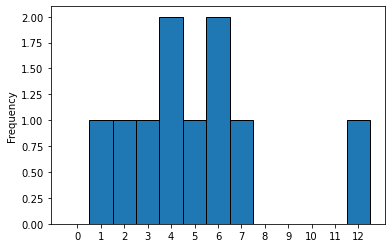

In [3]:
histogram(flatten(df))

## Vậy dùng Mann Whitney U

$H_0$: 2 mẫu này cùng một phân phối  
$H_1$: Data ở một mẫu lớn hơn mẫu còn lại  
$\alpha = 0.05$  
vì mannwhitneyu là twotail nên pval phải <0.025 mới có ý nghĩa.

In [4]:
# xếp rank data
df_rank = st.rankdata(df)
df_rank

array([ 9. ,  6. ,  7.5,  4.5, 10. ,  3. ,  7.5,  4.5,  2. ,  1. ])

In [5]:
R_1 = sum (df_rank[:5])
R_2 = sum (df_rank[5:])
R_1, R_2

(37.0, 18.0)

In [6]:
n1 = len(df_rank[:5])
n2 = len(df_rank[5:])
n1, n2

(5, 5)

In [7]:
U_1 = n1*n2 + n1*(n1+1)/2 - R_1
U_2 = n1*n2 + n2*(n2+1)/2 - R_2
U_1, U_2 

(3.0, 22.0)

U = min (u_1, u_2) => U=3  
[Criticalvalue](https://math.usask.ca/~laverty/S245/Tables/wmw.pdf) của n1=5, n2=5 là 2  
=> **3>2, 2 mẫu khác nhau không có ý nghĩa thống kê**

In [8]:
# Dùng scipy.stats.mannwhitneyu
st.mannwhitneyu(x=df.loc['Placebo'],
                y=df.loc['New drug'])

MannwhitneyuResult(statistic=3.0, pvalue=0.029276315078413294)

**pval=0.03 >0.025, vậy không reject $H_0$, 2 mẫu này khác nhau KHÔNG có ý nghĩa thống kê.**

## Ví dụ 2: 
Một nghiên cứu về chương trình sanh con mới.  
n=15

In [9]:
df2 = pd.DataFrame([[8,7,6,2,5,8,7,3], [9,8,7,8,10,9,6]], index=['Usual care', 'New program'])
df2

,0,1,2,3,4,5,6,7
Usual care,8,7,6,2,5,8,7,3.0
New program,9,8,7,8,10,9,6,NaN


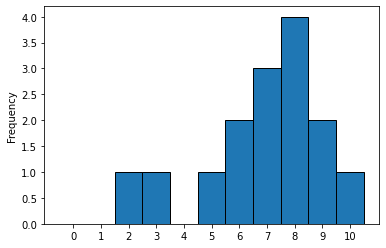

In [10]:
histogram(flatten(df2))

In [11]:
st.mannwhitneyu(x=df2.iloc[0],
                y=df2.iloc[1])

MannwhitneyuResult(statistic=9.5, pvalue=0.009690166341346689)

**pval=0.009, vậy reject $H_0$, 2 mẫu này khác nhau có ý nghĩa thống kê.**

## Ví dụ 3:
Một Antiretroviral therapy mới so với ARV therapy tiêu chuẩn.  
Bệnh nhân được theo dõi trong 3 tháng.  
Biến outcome là viral load, tức là số lượng HIV copies/ 1ml máu.  
n=30

In [12]:
df3 = pd.DataFrame([[7500,8000,2000,550,1250, 1000,2250,6800,3400,6300,9100,970,1040,670,400],                    
                    [400,250,800,1400,8000,7400,1020,6000,920,1420,2700,4200,5200,4100,'undetectable']],
                   index=['Standard ARV therapy', 'New ARV therapy'])
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Standard ARV therapy,7500,8000,2000,550,1250,1000,2250,6800,3400,6300,9100,970,1040,670,400
New ARV therapy,400,250,800,1400,8000,7400,1020,6000,920,1420,2700,4200,5200,4100,undetectable


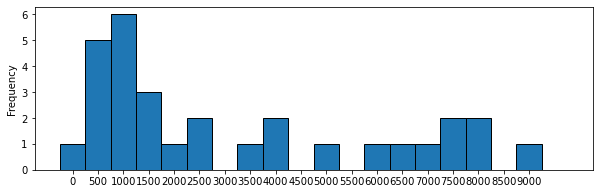

In [13]:
df3.replace('undetectable',0,inplace=True)
plt.figure(figsize=(10,3))
histogram(flatten(df3), step=500)

In [14]:
st.mannwhitneyu(x=df3.iloc[0],
                y=df3.iloc[1])

MannwhitneyuResult(statistic=100.0, pvalue=0.30929573792728193)

**Pval=0.31, không reject được $H_0$ => hiệu quả của new ARV therapy và standard ARV therapy khác nhau không có ý nghĩa thống kê.**

# IV. Hai mẫu liên quan: Wilcoxon sign test

**Kỹ thuật:**
- Tính sự khác nhau giữa 2 mẫu
- Sẽ có kết quả con số âm hoặc dương
- Xếp rank các giá trị tuyệt đối của các sự khác nhau
- Sau đó, đánh đấu âm dương cho các rank đó tuỳ vào dấu âm dương của sự khác nhau
- Tính W = min (sum(positive rank) ; sum(negative rank) )
- W < [critical value](http://users.sussex.ac.uk/~grahamh/RM1web/WilcoxonTable2005.pdf)  thì reject $H_0$

## Ví dụ 1:
Một nghiên cứu lâm sàng về hiệu quả của thuốc mới làm giảm hành vi lặp lại ở trẻ tự kỷ.  
n=8  
Mỗi trẻ được theo dõi bởi psycologist trong 3 tiếng, cả trước và sau khi dùng thuốc 1 tuần.  
Biến nghiên cứu có range 0-100, là tỉ lệ thời gian trẻ có hành vi lặp lại trong vòng 3 tiếng theo dõi.  

In [15]:
df4 = pd.DataFrame([[85, 70, 40, 65, 80, 75, 55, 20],
                    [75, 50, 50, 40, 20, 65, 40, 25]],
                   index=['Before', 'After'], columns=range(1,9))
df4.columns.name='child'
df4

child,1,2,3,4,5,6,7,8
Before,85,70,40,65,80,75,55,20
After,75,50,50,40,20,65,40,25


In [16]:
st.wilcoxon(x=df4.iloc[0],
            y=df4.iloc[1])

/Volumes/DATA/anaconda3/envs/jupyter/lib/python3.7/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=4.0, pvalue=0.04882999045688487)

**pval=0.049 < 0.05, median của thời gian có hành vi lặp lại, trước và sau thuốc mới khác nhau có ý nghĩa thống kê.**

## Ví dụ 2:
Nghiên cứu về tập thể dục làm giảm huyết áp tâm thu  
n=15  
Bn được tập thể dục theo một bài chung, làm 3 lần mỗi tuần trong 6 tuần.

In [17]:
df5 = pd.DataFrame([[125, 132, 138, 120, 125, 127, 136, 139, 131, 132, 135, 136, 128, 127, 130],
                    [118, 134, 130, 124, 105, 130, 130, 132, 123, 128, 126, 140, 135, 126, 132]],
                   index=['Before', 'After'], columns=range(1,16))
df5.columns.name='Patient'
df5

Patient,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Before,125,132,138,120,125,127,136,139,131,132,135,136,128,127,130
After,118,134,130,124,105,130,130,132,123,128,126,140,135,126,132


In [18]:
st.wilcoxon(x=df5.iloc[0], y=df5.iloc[1])

WilcoxonResult(statistic=31.0, pvalue=0.09885703460547064)

**=> pval=0.09 > 0.05 => median huyết áp 2 mẫu khác nha không có ý nghĩa thống kê**

# V. Nhiều mẫu độc lập: Kruskal–Wallis

$ H= \left( \frac{12}{N(N+1)}\sum_{j=1}^{k}\frac{R_j^2}{n_j} \right) -3(N+1)$

$R_j$ là sum rank nhóm j

## Ví dụ 1: Albumin (g/dL) máu ở 3 nhóm chế độ ăn

In [19]:
df6 = pd.DataFrame([[3.1,2.6,2.9],
                    [3.8,4.1,2.9,3.4,4.2],
                    [4.0,5.5,5.0,4.8]],
                    index=['5% Protein', '10% Protein', '15% Protein'])
df6

,0,1,2,3,4
5% Protein,3.1,2.6,2.9,NaN,NaN
10% Protein,3.8,4.1,2.9,3.4,4.2
15% Protein,4.0,5.5,5.0,4.8,NaN


In [20]:
st.kruskal(df6.iloc[0], df6.iloc[1], df6.iloc[2], nan_policy='omit')

KruskalResult(statistic=7.549473684210525, pvalue=0.02294312751270393)

**=> pval=0.02 < 0.05, 3 chế độ ăn có median albumin máu khác nhau**

## Ví dụ 2: Ngưỡng ức chế cơ do thiếu oxy ở vận động viên, đo bằng nhịp tim max

In [21]:
df7 = pd.DataFrame([[185, 179, 192, 165, 174],
                    [190, 209, 182, 178, 181],
                    [166, 159, 170, 183, 160],
                    [201, 195, 180, 187, 215]],
                  index=['Distance runners', 'Distance cyclists', 'Distance swimmers', 'Cross-Country Skiers'])
df7

,0,1,2,3,4
Distance runners,185,179,192,165,174
Distance cyclists,190,209,182,178,181
Distance swimmers,166,159,170,183,160
Cross-Country Skiers,201,195,180,187,215


In [22]:
st.kruskal(*[row[1] for row in df7.iterrows()])

KruskalResult(statistic=9.114285714285714, pvalue=0.027809360261068908)

**=> pval=0.028 < 0.05, median nhịp tim max ở các nhóm vận động viên khác nhau có ý nghĩa thống kê**  
Nhìn vào data, ta thấy ít có sự khác biệt giữa các nhóm, tuy nhiên chỉ có nhóm swimmer là nhịp tim thấp hơn rõ. Do đó, tương tự ANOVA, chỉ cần có 1 nhóm không giống thì reject Null hypothesis.

# VI. TỔNG KẾT:
Ở đây, tôi đã trình bày các pp thống kê kiểm định giả thuyết trong trường hợp:
- Cỡ mẫu quá nhỏ
- Biến quan tâm là biến liên tục nhưng không normal
- Biến xếp rank

Cách làm cũng tương tự như parametric, như tính ra số kết quả stats, tìm ra  p-value để có/không reject $H_0$.

Nên lưu ý rằng, nonparametric tests có power thấp so với parametric, vì cỡ mẫu nhỏ.  
**POWER** là xác suất reject $H_0$ khi $H_1$ đúng. 